In [41]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [118]:
df = pd.read_csv('News_Final.csv')

In [43]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


#### EDA

In [44]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [45]:
df['Source'].value_counts()

Bloomberg                              1732
Reuters                                1321
ABC News                               1098
New York Times                          992
The Guardian                            933
Business Insider                        884
Economic Times                          787
Forbes                                  781
Washington Post                         774
CNN                                     742
Wall Street Journal                     730
WinBeta                                 707
CNBC                                    682
Huffington Post                         676
Breitbart News                          605
Reuters via Yahoo! Finance              551
The Hill                                548
Financial Times                         544
USA TODAY                               530
ZDNet                                   526
MSPoweruser.com                         516
Daily Mail                              510
Fox News                        

#### Drop the rows containing Obama and Economy as per objective we need only Microsoft and Palestine 

In [46]:
df = df.drop(df[df.Topic == 'obama'].index)

In [47]:
df = df.drop(df[df.Topic == 'economy'].index)

In [48]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
10,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1


In [49]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline               4
Source               239
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

#### Fill the Null values 

In [50]:
df.Source.fillna(df.Source.mode()[0],inplace = True) #Replace the null values of the Source with the mode 

In [51]:
df.isnull().sum()

IDLink               0
Title                0
Headline             4
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30701 entries, 5 to 93238
Data columns (total 11 columns):
IDLink               30701 non-null float64
Title                30701 non-null object
Headline             30697 non-null object
Source               30701 non-null object
Topic                30701 non-null object
PublishDate          30701 non-null object
SentimentTitle       30701 non-null float64
SentimentHeadline    30701 non-null float64
Facebook             30701 non-null int64
GooglePlus           30701 non-null int64
LinkedIn             30701 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDLink,30701.0,45494.048956,28776.617920,101.000000,20624.000000,44464.000000,66312.000000,104800.000000
SentimentTitle,30701.0,-0.004106,0.124850,-0.950694,-0.068041,0.000000,0.061688,0.714610
SentimentHeadline,30701.0,-0.023311,0.136808,-0.732337,-0.108333,-0.024098,0.060634,0.964646
Facebook,30701.0,36.069802,307.743616,-1.000000,0.000000,2.000000,14.000000,22346.000000
GooglePlus,30701.0,3.714244,20.281858,-1.000000,0.000000,0.000000,2.000000,1016.000000
LinkedIn,30701.0,24.650598,246.597801,-1.000000,0.000000,0.000000,5.000000,20341.000000


In [54]:
df['Topic'].value_counts()

microsoft    21858
palestine     8843
Name: Topic, dtype: int64

In [55]:
max_sen_title = df.groupby(['Title','SentimentTitle'], as_index=False).max()  

#### High to Low SentimentTitle score based on Source

In [56]:
df[['Source','SentimentTitle']].groupby('Source').agg('median').sort_values(by='SentimentTitle',ascending=False).head()

,SentimentTitle
Source,
Yahoo Tech via Yahoo! News,0.714610
Focus News,0.500000
ChinaTopix,0.474342
Mensquare,0.395292
4k,0.376889


In [57]:
df[['Topic','SentimentTitle','SentimentHeadline']].groupby('Topic').agg('mean').sort_values(by='SentimentTitle',ascending=False)

,SentimentTitle,SentimentHeadline
Topic,,
microsoft,0.002359,-0.014744
palestine,-0.020085,-0.044485


#### Convert Published Date to Datetime

In [58]:
df['Date'] = pd.to_datetime(df['PublishDate'])

In [59]:
df['Date'].min(),df['Date'].max()

(Timestamp('2015-03-01 00:19:00'), Timestamp('2016-07-07 16:16:11'))

In [60]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month_name'] = df['Date'].dt.strftime('%b')
df['weekday'] = df['Date'].dt.strftime('%A')

#### Monday is having the Highest number of News Published

In [61]:
df.weekday.value_counts()

Monday       5672
Tuesday      5638
Wednesday    5421
Thursday     5127
Friday       4287
Sunday       2322
Saturday     2234
Name: weekday, dtype: int64

#### March is having the Highest number of News Published, while it is coming 2 times in 2015 and 2016. 

In [62]:
df.month_name.value_counts()

Mar    4283
Jan    4211
Dec    3857
May    3678
Jun    3639
Apr    3598
Feb    3511
Nov    3021
Jul     680
Oct     219
Sep       3
Aug       1
Name: month_name, dtype: int64

#### News published based on Month and Topic 

In [63]:
df[['month_name','Topic','IDLink']].groupby(['month_name','Topic']).agg('count').sort_values(by='IDLink',ascending=False)

,,IDLink
month_name,Topic,
Mar,microsoft,3028
Jan,microsoft,2864
May,microsoft,2719
Jun,microsoft,2703
Dec,microsoft,2664
Apr,microsoft,2609
Feb,microsoft,2396
Nov,microsoft,2259
Jan,palestine,1347


In [64]:
df['GooglePlus'].value_counts().head()

 0    15928
 1     3590
-1     2690
 2     1980
 3     1257
Name: GooglePlus, dtype: int64

In [65]:
df['LinkedIn'].value_counts().head()

 0    15360
-1     2690
 1     2295
 2     1140
 3      778
Name: LinkedIn, dtype: int64

In [66]:
df['Facebook'].value_counts().head()

 0    6390
-1    5037
 1    2260
 2    1667
 3    1330
Name: Facebook, dtype: int64

#### Making of wordCloud from Title

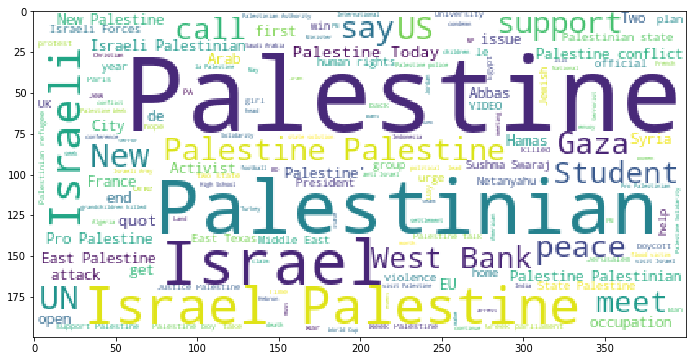

In [67]:
import nltk
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')
stopwords
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='palestine'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

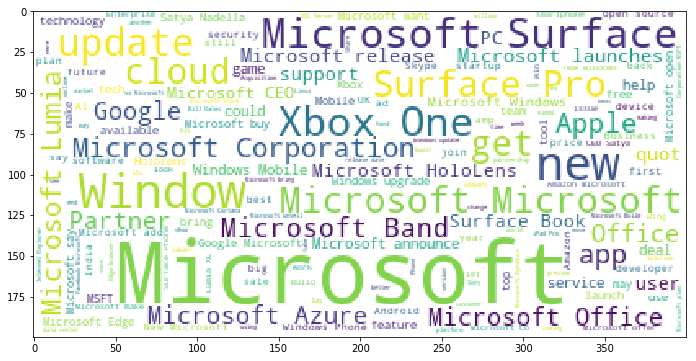

In [68]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [69]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate                  object
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
dtype: object

In [70]:
df.Headline = df.Headline.apply(str)

In [71]:
docs = df['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(['amp','rt'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

5      attende expect see latest version microsoft d...
6     ramallah februari   wafa  palestin liber organ...
8     hancock counti man lost barn earli monday morn...
9     new delhi feb  technolog giant microsoft targe...
10    microsoft may burn one bridg still build diffe...
Name: Headline, dtype: object

In [72]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate                  object
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
dtype: object

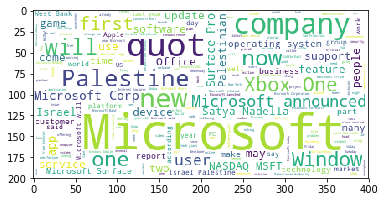

In [73]:
text = ' '.join(df['Headline'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [106]:
ndf1=df[df['Topic']=='microsoft']
docs = ndf1['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','microsoft'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

5      attende expect see latest version dynam sl dy...
9     new delhi feb  technolog giant target rival ap...
10    may burn one bridg still build differ perhap c...
11    platform battl back mwc analysi two parallel t...
14    microsoft ar headset made avail develop along ...
Name: Headline, dtype: object

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


In [108]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.75334482389215

In [109]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())


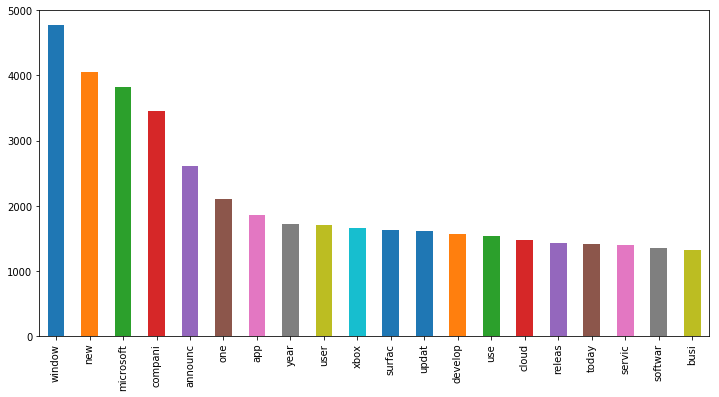

In [112]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [89]:
ndf2=df[df['Topic']=='palestine']
docs =ndf2['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','palestine','palestinian'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

6      ramallah februari   wafa  liber organ sectreta...
8      hancock counti man lost barn earli monday morn...
56     ramallah februari   wafa  govern japan contrib...
111    ramallah februari   wafa  govern japan contrib...
140    forc evict farmer land jordan valley hebron di...
Name: Headline, dtype: object

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


In [91]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.67911561646959

In [92]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())


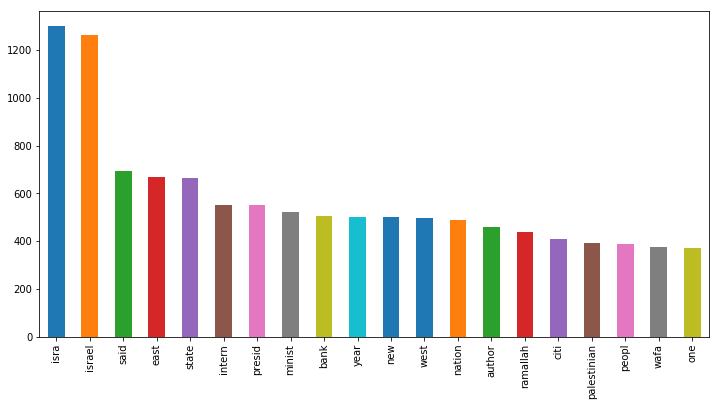

In [93]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [120]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment=SentimentIntensityAnalyzer()
sentiment.polarity_scores(df.Title[0])   # it does bot consider check single letter word

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}